# 1. Load file

In [2]:
import nltk
from stanfordcorenlp import StanfordCoreNLP
import numpy as np

def write_to_text(name, obj):
    '''
    input: file names, quora keywords
    output：txt
    '''
    with open(str(name)+'.txt','a',encoding='utf-8') as f:
        f.write(obj)  
        
#read txt
def read_txt(obj):
    '''
    input：txt file name
    output：str 
    '''
    with open(str(obj)+'.txt','r',encoding='utf-8') as f:
        obj = f.read()
    return obj

In [38]:
clean_alexa = read_txt('clean_alexa')
clean_siri = read_txt('clean_siri')
clean_cortana = read_txt('clean_cortana')
clean_google = read_txt('clean_google')

clean_text = clean_alexa + clean_siri + clean_cortana + clean_google

In [ ]:
alexa = read_txt('alexa')
siri = read_txt('siri')
cortana = read_txt('cortana')
google = read_txt('google')
mix = read_txt('mix')

text = alexa + siri + cortana + google + mix

In [ ]:
answer_no = []
for i in [alexa,siri,cortana,google,mix]:
    answer_no.append(i.count('ui_qtext_expanded'))
print('number of answers:',answer_no)

In [ ]:
answer_len = []
for i in [alexa,siri,cortana,google,mix]:
    answer_len.append(len(i))
print('number of characters',answer_len)

In [5]:
print(52673+89250+29558+17938+241154)
print(108485+103340+18834+44940)
print(44+ 72+31+25+162)

430573
275599
334


In [3]:
token_no = []
for i in [clean_alexa,clean_siri,clean_cortana,clean_google]:
    token_no.append(len(i))
print('token number:',token_no)

token number: [108485, 103340, 18834, 44940]


# 2. Text normalization - pre-processing

## 2.1 Concordance

In [43]:
import nltk
from nltk.corpus import PlaintextCorpusReader
text = nltk.word_tokenize(clean_text)
b = nltk.text.Text(text)
b.concordance('but')
# aireplane restaurant  household

Displaying 25 of 25 matches:
uturistic . Hey , it 's a minor thing but I like that . Devices supporting the 
a turns into an idiot . Fair enough , but it still chafes to be so used to a de
ng have it fail . Believe it or not , But overall if we see it ’ s good . Three
up my phone and look at my calendar . But I love being able to simply ask for m
veryone needs to own ? Probably not . But for people who have a busy life or th
aybe she doesn ’ t like Southerners , but she just doesn ’ t seem to understand
 has advanced a fair bit since then , but I ’ m having the same struggles with 
itten about this before here on Quora but I am not sure if I can link to one of
I can link to one of my prior posts . But I wrote a long post listing many of t
aven ’ t actually done this one yet , but I have listened to a book being read 
up my phone and look at my calendar . But I love being able to simply ask for m
a few ways you can use Amazon Alexa . But with skills , there is no limit to th
ight seem f

## 2.2. Lemmatizer + case switch

In [3]:
#context-centered pre-processing

import nltk
from nltk.corpus import stopwords
import re
import time
def tfidf_preprocess(doc):
    '''
    tf: all words excluding some high-freq function words 
    idf: all unique words excluding some function words 
    '''
    assert type(doc) == str
    start = time.time()
    doc = re.sub('[^a-zA-Z-]',' ',doc)
    doc = nltk.word_tokenize(doc)
    doc = [w.lower() for w in doc if w.lower() not in stopwords.words('english')]
    wnl = nltk.WordNetLemmatizer()
    doc = [wnl.lemmatize(n) for n in doc if len(n)>1]
    tf = [w for w in doc if doc.count(w)>1]
    idf = list(set(tf))
    end = time.time()
    print(end-start)
    return tf, idf


In [4]:
(context_word, unique_word) = tfidf_preprocess(text)

101.69694638252258


In [49]:
#voc数
voc = []
for i in tkn_list:
    voc.append(len(set(i)))
print('voc size',voc)

#lexical diversity = token/type 包括标点
for i in [alexa,siri,cortana,google,mix]:
    print('lexical diversity:',len(i)/len(set(i)))

voc size [2219, 3460, 1587, 1043, 5837]
lexical diversity: 862.8522727272727
lexical diversity: 1102.8271604938273
lexical diversity: 375.5189873417722
lexical diversity: 253.8732394366197
lexical diversity: 3022.360465116279


## 2.3 Frequency

alexa 694
siri 828
cortana 264
google 366
command: 65
useful%: 112 0.28 %
[('siri', 828), ('alexa', 694), ('google-assistant', 526), ('voice', 420), ('assistant', 409), ('amazon', 382), ('google', 366), ('echo', 317), ('like', 306), ('device', 304), ('use', 274), ('skill', 274), ('cortana', 264), ('apple', 260), ('one', 255), ('also', 245), ('home', 237), ('question', 237), ('time', 204), ('get', 186), ('answer', 185), ('thing', 182), ('search', 173), ('user', 171), ('make', 167), ('smart', 164), ('know', 162), ('need', 162), ('way', 157), ('better', 156), ('ask', 155), ('phone', 151), ('music', 145), ('work', 142), ('people', 139), ('say', 136), ('play', 132), ('much', 129), ('would', 128), ('best', 128), ('using', 126), ('even', 125), ('many', 124), ('year', 119), ('well', 118), ('system', 113), ('useful', 112), ('want', 111), ('product', 111), ('technology', 108), ('help', 105), ('really', 104), ('first', 101), ('speaker', 100), ('interface', 98), ('ai', 97), ('new', 96), ('task', 9

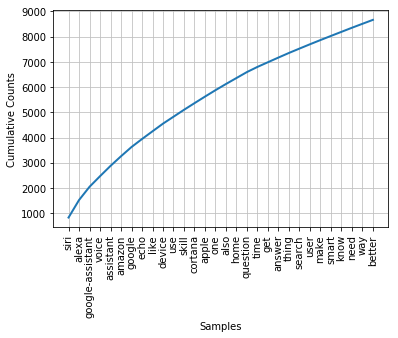

In [15]:
#词频
for i in ['alexa','siri','cortana','google']:
    print(i, processed_corpus[0].count(i))
    
#频率分布
fdist = nltk.FreqDist(processed_corpus[0])

#查询词频
print('command:',fdist['command'])
print('useful%:',fdist['useful'], round(100*fdist.freq('useful'),2),'%')

#最高频20词，字典转列表
print(fdist.most_common(100))
fdist.plot(30,cumulative=True)

## 2.4 Keywords - TFIDF 

In [7]:
#TFIDF
import time
import nltk
import math

brown = nltk.corpus.brown

def idf(target_doc):
    '''
    input: target document
    output: sorted IDF list
    '''
    assert type(target_doc)==list
    time_start = time.time()
    idfs = {}
    dfs = {} #document frequency文档频数
    for word in target_doc: #对每一个target_doc里的词抽查
        if word not in dfs: #如果这个词是第一次出现，加到idfs的字典里
            dfs[word] = 1  #初始化出现的文档数为1，因为在当前文档中出现过，起码在1个文档里出现过
            for doc in ['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15']: 
            #for doc in brown.fileids():  #对brown语料库里每个文档进行检索
                doc_list = [w.lower() for w in brown.words(doc)]
                if word in doc_list: #只要在一个文档里出现过一次，就计一次数，文档数+1
                    dfs[word] += 1 #在一个文档里出现一次，分母+1，最后得到一个关于每个词在几个文档里出现过的字典
                else:
                    continue
        else:
            continue #计过数了就不管了，继续看下一个词
    #最后的idf是用总文档数/出现过的文档数
    for word in dfs.keys():
        idfs[word] = math.log10(16/dfs[word])
    time_end = time.time()
    print(time_end - time_start)
    return idfs

def tf(target_doc):
    assert type(target_doc)==list
    start = time.time()
    raw_tf = {}
    for word in target_doc:
        if word not in raw_tf:
            raw_tf[word] = target_doc.count(word)
        else:
            continue
    tf = {}
    for word in raw_tf.keys():
        tf[word] = math.log10(raw_tf[word])
    end = time.time()
    print(end-start)
    return tf

def tfidf(tf,idf):
    assert type(tf) == type(idf) 
    start = time.time()
    tfidfs = {}
    for word in tf.keys():
        tfidfs[word] = tf[word] * idf[word]
    end = time.time()
    print(end-start)
    return sorted(tfidfs.items(), key=lambda x:x[1],reverse=True)

In [12]:
filtered_context_word = [w for w in context_word if w not in ['siri','alexa','google-assistant','amazon','google','echo','cortana','apple','me','you','your']]
filtered_unique_word = [w for w in unique_word if w not in ['siri','alexa','google-assistant','amazon','google','echo','cortana','apple','me','you','your']]

In [8]:
tf_sum = tf(filtered_context_word)
idf_sum = idf(filtered_unique_word)

3.5610148906707764
573.4620881080627


In [10]:
tfidf_sum = tfidf(tf_sum, idf_sum)
tfidf_sum[:100]

0.002068042755126953


[('music', 2.6025464013642488),
 ('useful', 2.4675043699158272),
 ('interface', 2.3976751077268723),
 ('ai', 2.3923115462059523),
 ('voice', 2.369030167542065),
 ('app', 2.3589208873439143),
 ('recognition', 2.3413904414642075),
 ('data', 2.323251883367107),
 ('apps', 2.2849707002520594),
 ('market', 2.264725230116174),
 ('device', 2.2422582723238698),
 ('window', 2.1909492121063683),
 ('u', 2.1829651995574895),
 ('intelligence', 2.158254650071261),
 ('virtual', 2.14975132996827),
 ('microsoft', 2.14975132996827),
 ('developer', 2.1233788850239765),
 ('language', 2.0956054914888274),
 ('query', 2.0860099440312654),
 ('iphone', 2.0561193708268215),
 ('answer', 2.04746008671198),
 ('artificial', 2.0244161695891174),
 ('search', 2.021157026161954),
 ('access', 2.013406443696565),
 ('reminder', 2.00215993144542),
 ('simply', 2.00215993144542),
 ('simple', 2.00215993144542),
 ('capability', 1.9906662234137247),
 ('v', 1.9906662234137247),
 ('web', 1.978914208306381),
 ('phone', 1.9678122629

## 2.5 Segmentation

In [6]:
#Punkt sentence segmenter (Kiss & Strunk, 2006)
def segment(doc):
    assert isinstance(doc, str)
    sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sents = sent_tokenizer.tokenize(doc)
    return sents


In [7]:
seg_alexa = segment(clean_alexa)
seg_siri = segment(clean_siri) 
seg_cortana = segment(clean_cortana) 
seg_google = segment(clean_google) 

seg_text = seg_alexa + seg_siri + seg_cortana + seg_google
print(len(seg_alexa),len(seg_siri),len(seg_cortana),len(seg_google),len(seg_text))

1233 1088 259 465 3045


对每个句子里的词作分词处理

In [82]:
nlp = StanfordCoreNLP(r'D:\Program Files\Python\stanford-corenlp-full-2018-10-05')
def tokenizer(sentence_set):
    tokenized_sentence_set = []
    for sentence in sentence_set:
        tokenized_sentence_set.append(nlp.word_tokenize(sentence))
    return tokenized_sentence_set
        
tkn_alexa = tokenizer(seg_alexa)
tkn_siri = tokenizer(seg_siri)
tkn_cortana = tokenizer(seg_cortana)
tkn_google = tokenizer(seg_google)
tkn_corpus = tokenizer(seg_corpus)

nlp.close()

对每个句子里的词作词性还原

In [88]:
wnl = nltk.WordNetLemmatizer()
wnl_corpus = []
for sentence in range(len(tkn_corpus)):
    for word in range(len(tkn_corpus[sentence])):
        original_word = tkn_corpus[sentence][word] 
        #tkn_corpus[sentence][word] = wnl.lemmatize(original_word)

## 2.6 POS

In [20]:
#POS
tag_corpus = nltk.pos_tag(processed_corpus[0])
#print(tag_alexa)

In [65]:
nlp = StanfordCoreNLP(r'D:\Program Files\Python\stanford-corenlp-full-2018-10-05')
test = 'review Google-Assistant make your life more simpler. But I hate alexa.'
test = nlp.word_tokenize(test)
test = nltk.pos_tag(test)
nlp.close()
test

[('review', 'NN'),
 ('Google-Assistant', 'JJ'),
 ('make', 'VB'),
 ('your', 'PRP$'),
 ('life', 'NN'),
 ('more', 'RBR'),
 ('simpler', 'NN'),
 ('.', '.'),
 ('But', 'CC'),
 ('I', 'PRP'),
 ('hate', 'VBP'),
 ('alexa', 'NNS'),
 ('.', '.')]

# 3. Sentiment analysis & Aspect extraction

## 3.1 Dependency parser

In [68]:
nlp = StanfordCoreNLP(r'D:\Program Files\Python\stanford-corenlp-full-2018-10-05')
parse_alexa = [nlp.dependency_parse(s) for s in seg_alexa]
parse_siri = [nlp.dependency_parse(s) for s in seg_siri]
parse_cortana = [nlp.dependency_parse(s) for s in seg_cortana]
parse_google = [nlp.dependency_parse(s) for s in seg_google]
nlp.close()

In [ ]:
print(seg_alexa[11],parse_alexa[11])

In [94]:
compound = []
for sentence in range(len(seg_corpus)):
    for word in range(len(parse_text[sentence])):
        if parse_text[sentence][word][0] == 'compound':
            start = parse_text[sentence][word][2] - 1
            end = parse_text[sentence][word][1] - 1
            start_word = tkn_corpus[sentence][start].lower()
            end_word = tkn_corpus[sentence][end].lower()
            if (start_word not in ['alexa', 'amazon', 'cortana', 'siri', 'echo', 'google-assistant','google']) and (end_word not in ['alexa', 'cortana', 'amazon', 'siri', 'echo', 'google-assistant','google']):
                compound_word =  start_word + ' ' + end_word
                compound.append(compound_word)

In [95]:
compound_set = list(set(compound))
compound_freq = {}
for phrase in compound_set:
    ind = phrase
    freq = compound.count(phrase)
    compound_freq[ind] = freq
compound_freq = sorted(compound_freq.items(),key=lambda x:x[1], reverse=True)

In [98]:
len(compound)

3728

In [96]:
compound_freq

[('voice assistant', 74),
 ('voice interface', 27),
 ('voice recognition', 22),
 ('speech recognition', 19),
 ('e. g.', 19),
 ('shopping list', 17),
 ('use case', 13),
 ('home system', 13),
 ('search engine', 11),
 ('language processing', 11),
 ('web search', 11),
 ('home device', 10),
 ('home automation', 10),
 ('voice search', 10),
 ('voice technology', 10),
 ('apple tv', 10),
 ('voice system', 10),
 ('machine learning', 9),
 ('home button', 9),
 ('voice control', 9),
 ('artificial intelligence', 9),
 ('home pod', 8),
 ('recognition system', 8),
 ('user interface', 8),
 ('search result', 8),
 ('ai assistant', 8),
 ('apple yes', 8),
 ('windows no', 7),
 ('ios device', 7),
 ('loup ventures', 7),
 ('text message', 7),
 ('app store', 7),
 ('bedroom light', 6),
 ('android phone', 6),
 ('streaming service', 6),
 ('to-do list', 6),
 ('play music', 6),
 ('living room', 6),
 ('apple device', 6),
 ('voice mands', 6),
 ('voice command', 6),
 ('windows yes', 6),
 ('iphone 4s', 5),
 ('jon snow', 

In [ ]:
('nsubj', 6, 3)('nsubj', 评价, 特征)
('compound', 3, 2)特征

抽取有情感的句子

In [40]:
print(len(nlp_alexa),len(nlp_siri),len(nlp_cortana),len(nlp_google))

22466 20689 3877 8943


In [9]:
print(len(alexa_list),len(siri_list),len(cortana_list),len(google_list))

948 657 151 336


In [44]:
for i in range(len(alexa_list)):
    print(alexa_list[i],alexa_score[i])

What is your review of Amazon Alexa? 0.1779
Positives: 0.5267
Today I used it to check the news, send a grocery list to my phone, act as a kitchen timer, tell me the time, control lights, play background music and calm my dogs with the sound of distant ocean surf. 0.5719
The voice recognition is stunningly good. 0.4404
Because of cloud services, it always gets smarter. 0.4588
Amazon has done a pretty good job of enabling users to add their own macro-like capabilities, which is cool. 0.8442
The feedback lights on top are cool and futuristic. 0.4767
but I like that. 0.5023
Devices supporting the Alexa makes your home automation, Awesome na!!! 0.8349
Negatives: I'm pretty sure over time amazon is going to know way too much about my daily life. 0.7351
The voice command volume controls are too crude. -0.5719
The echo desperately needs to separate volume controls by task. -0.3818
Music volume should be separate from alarm volumes, and separate from the volume of Alexa's responses. -0.34
It's

### 1. 为每个句子抽取aspect candidate

In [4]:
def aspect_extraction_preparation(doc):
    doc_sent = []
    for s in list(doc.sents):
        doc_sent += [[w for w in s]]

    dep_doc = []
    for s in list(doc.sents):
        dep_doc += [[w.dep_ for w in s]]

    pos_doc = []
    for s in list(doc.sents):
        pos_doc += [[w.tag_ for w in s]]
    
    return dep_doc, pos_doc, doc_sent

In [5]:
def conj_aspect_extraction(doc_sent, dep_doc, others):
    global result
    if 'compound' in dep_doc:
        for token in doc_sent:
            if token.dep_ == 'compound':
                result = token.text + ' ' + token.head.text
                break 
            else:
                continue

    elif dep_doc.count('pobj') > 1 and dep_doc.count('prep') > 1:
        for token in doc_sent:
            if token.dep_ == 'pobj' and token.head.dep_ == 'prep' and token.head.head.dep_ == 'pobj' and token.head.head.head.dep_ == 'prep':
                a,b,c,d,e = token, token.head, token.head.head, token.head.head.head, token.head.head.head.head
                result = e.text + ' ' + d.text + ' ' + a.text
                break
            else:
                continue

    elif 'dobj' in dep_doc:
        for token in doc_sent:
            if token.dep_ == 'dobj' and token.pos_ == 'NOUN' and token.head.pos_ == 'VERB':
                a, b = token, token.head
                result = b.text + ' ' + a.text
                break
            else:
                continue

    elif dep_doc.count('pobj') == 1:
        for token in doc_sent:
                if token.dep_ == 'pobj' and token.head.dep_ == 'prep':
                        a,b,c = token, token.head, token.head.head
                        result = c.text + ' ' + b.text + ' ' + a.text
                        break
                
    else:
        others.append(doc_sent)
        result = 'NA'
        
    return result

In [6]:

def aspect_extraction(dep_doc, pos_doc, doc_sent):
    aspect = []
    others = []
    candidate_aspect_term = []
    for s in range(len(dep_doc)):
        if 'conj' in dep_doc[s]:
            if dep_doc[s].count('conj') == 1:
                for token in range(len(doc_sent[s])):
                    if dep_doc[s][token] == 'conj':
                        sent_1 = doc_sent[s][:token]
                        dep_sent_1 = dep_doc[s][:token]
                        sent_2 = doc_sent[s][token:]
                        dep_sent_2 = dep_doc[s][token:]
                        word_1 = conj_aspect_extraction(sent_1, dep_sent_1,others)
                        word_2 = conj_aspect_extraction(sent_2, dep_sent_2,others)
                        if word_1 != 'NA' and word_2 != 'NA' and word_1 != word_2:
                            word = (word_1, word_2)
                            candidate_aspect_term.append(word_1)
                            candidate_aspect_term.append(word_2)
                        elif word_1 != 'NA':
                            word = word_1
                            candidate_aspect_term.append(word_1)
                        elif word_2 != 'NA':
                            word = word_2
                            candidate_aspect_term.append(word_2)
                        else: 
                            others.append(doc_sent[s])
                            break
                        aspect.append((word, doc_sent[s]))
                        
                        
                        break
                    else:
                        continue

            elif dep_doc[s].count('conj') == 2:
                for token in range(len(doc_sent[s])):
                    if pos_doc[s][token] == 'CC':
                        sent_n = doc_sent[s][:token]
                        dep_sent_n = dep_doc[s][:token]
                        sent_3 = doc_sent[s][token:]
                        dep_sent_3 = dep_doc[s][token:]

                for token in range(len(sent_n)):
                    if dep_sent_n[token] == 'conj':
                        sent_1 = sent_n[:token]
                        dep_sent_1 = dep_sent_n[:token]
                        sent_2 = sent_n[token:]
                        dep_sent_2 = dep_sent_n[token:]
                        word_1 = conj_aspect_extraction(sent_1, dep_sent_1,others)
                        word_2 = conj_aspect_extraction(sent_2, dep_sent_2,others)
                        word_3 = conj_aspect_extraction(sent_3, dep_sent_3,others)

                        if word_1 != 'NA'and word_2 != 'NA' and word_3 != 'NA'and word_1 != word_2 != word_3:
                            word = (word_1, word_2, word_3)
                            candidate_aspect_term.append(word_1)
                            candidate_aspect_term.append(word_2)
                            candidate_aspect_term.append(word_3)
                        elif word_1 != 'NA' and word_2 != 'NA' and word_1 != word_2:
                            word = (word_1, word_2)
                            candidate_aspect_term.append(word_1)
                            candidate_aspect_term.append(word_2)
                        elif word_2 != 'NA' and word_3 != 'NA' and word_2 != word_3:
                            word = (word_2, word_3)
                            candidate_aspect_term.append(word_2)
                            candidate_aspect_term.append(word_3)
                        elif word_1 != 'NA' and word_3 != 'NA' and word_1 != word_3:
                            word = (word_1, word_3)
                            candidate_aspect_term.append(word_1)
                            candidate_aspect_term.append(word_3)
                        elif word_1 != 'NA':
                            word = word_1
                            candidate_aspect_term.append(word_1)
                        elif word_2 != 'NA':
                            word = word_2
                            candidate_aspect_term.append(word_2)
                        elif word_3 != 'NA':
                            word = word_3
                            candidate_aspect_term.append(word_3)
                        else:                         
                            others.append(doc_sent[s])
                            break
                        aspect.append((word, doc_sent[s]))
                        break

            else:
                others.append(doc_sent[s])

        else:
            if 'compound' in dep_doc[s]:
                for token in doc_sent[s]:
                    if token.dep_ == 'compound':
                        word = token.text + ' ' + token.head.text
                        aspect.append((word, doc_sent[s]))
                        candidate_aspect_term.append(word)
                        break 
                    else:
                        continue

            elif dep_doc[s].count('pobj') > 1 and dep_doc[s].count('prep') > 1:
                for token in doc_sent[s]:
                    if token.dep_ == 'pobj' and token.head.dep_ == 'prep' and token.head.head.dep_ == 'pobj' and token.head.head.head.dep_ == 'prep':
                        a,b,c,d,e = token, token.head, token.head.head, token.head.head.head, token.head.head.head.head
                        word = e.text + ' ' + d.text + ' ' + a.text
                        aspect.append((word, doc_sent[s]))
                        candidate_aspect_term.append(word)
                        break
                    else:
                        continue

            elif 'dobj' in dep_doc[s]:
                for token in doc_sent[s]:
                    if token.dep_ == 'dobj' and token.pos_ == 'NOUN' and token.head.pos_ == 'VERB':
                        a, b = token, token.head
                        word = b.text + ' ' + a.text
                        aspect.append((word, doc_sent[s]))
                        candidate_aspect_term.append(word)
                        break
                    else:
                        continue

            elif dep_doc[s].count('pobj') == 1:
                for token in doc_sent[s]:
                        if token.dep_ == 'pobj' and token.head.dep_ == 'prep':
                            a,b,c = token, token.head, token.head.head
                            word = c.text + ' ' + b.text + ' ' + a.text
                            aspect.append((word, doc_sent[s]))
                            candidate_aspect_term.append(word)
                            break   
            else:
                others.append(doc_sent[s])
    return aspect, others, candidate_aspect_term


### 2. aspect排序统计

In [7]:
aspect_candidate = alexa_candidate + siri_candidate + cortana_candidate + google_candidate
wnl = nltk.WordNetLemmatizer()

# 词性还原
for n in range(len(aspect_candidate)):
    aspect_candidate[n] = aspect_candidate[n].lower()
    aspect_candidate[n] = wnl.lemmatize(aspect_candidate[n])

# 统计频数
aspect_freq = {}
for n in list(set(aspect_candidate)):
    aspect_freq[n] = aspect_candidate.count(n)

# sorting
d = sorted(aspect_freq.items(), key = lambda k: k[1], reverse=True)
d

NameError: name 'alexa_candidate' is not defined

### 3. 根据频率分类aspect

In [48]:

def aspect_classification(candidate):
    '''
    input: candidate, list only containing aspect words
    '''
    #global smart_home, answer_question, voice_recognition, voice_interface, traffic, media, weather, photo, search, lists, voice_control, set_timer
    #global play_game, device_voice, make_call, send_message, set_reminder, understanding, booking

    smart_home = []
    answer_question = []
    voice_recognition = []
    voice_interface = []
    traffic = []
    media = []
    weather = []
    photo = []
    search = []
    lists = []
    voice_control = []
    set_timer = []
    play_game = []
    device_voice = []
    make_call = []
    send_message = []
    set_reminder = []
    understanding = []
    booking = []

    other_candidate = []
    
    wnl = nltk.WordNetLemmatizer()
    
    for key in candidate:
        
        key0 = key.lower()
        key0 = wnl.lemmatize(key0)
        
        if 'home' in key0 and 'button' not in key0 and 'friend' not in key0:
            smart_home.append(key)
        elif 'automation' in key0:
            smart_home.append(key)
        elif 'light' in key0 and 'flight' not in key0 and 'delight' not in key0:
            smart_home.append(key)
        elif 'lighting' in key0:
            smart_home.append(key)
        elif 'turn' in key0 and 'return' not in key0:
            smart_home.append(key)
        elif 'philip' in key0:
            smart_home.append(key)
        elif 'iot' in key0:
            smart_home.append(key)
        elif 'room' in key0:
            smart_home.append(key)
        elif 'illuminat' in key0:
            smart_home.append(key)
        elif 'temperature' in key0:
            smart_home.append(key)
        elif 'household' in key0:
            smart_home.append(key)
        elif 'house' in key0 and 'device' in key0:
            smart_home.append(key)
        elif 'house' in key0 and 'control' in key0:
            smart_home.append(key)

        elif 'recognition' in key0:
            voice_recognition.append(key)
        elif 'recognis' in key0:
            voice_recognition.append(key)
        elif 'recogniz' in key0:
            voice_recognition.append(key)
        elif 'accent' in key0:
            voice_recognition.append(key)
        elif 'error correct' in key0:
            voice_recognition.append(key)
        elif 'dialect' in key0:
            voice_recognition.append(key)
        elif 'misheard' in key0:
            voice_recognition.append(key)

        elif 'interface' in key0:
            voice_interface.append(key)
        elif 'operating' in key0:
            voice_interface.append(key)

        elif 'photo' in key0:
            photo.append(key)
        elif 'selfie' in key0:
            photo.append(key)
        elif 'picture' in key0:
            photo.append(key)

        elif 'weather' in key0:
            weather.append(key)

        elif 'music' in key0:
            media.append(key)
        elif 'song' in key0:
            media.append(key)
        elif 'mp3' in key0:
            media.append(key)
        elif 'player' in key0:
            media.append(key)
        elif 'playlist' in key0:
            media.append(key)
        elif 'hop' in key0 and 'shop' not in key0:
            media.append(key)
        elif 'listen to news' in key0:
            media.append(key)
        elif 'video' in key0:
            media.append(key)
        elif 'movie' in key0:
            media.append(key)
        elif 'podcast' in key0:
            media.append(key)
        elif 'book' in key0 and ('booking' and 'booked') not in key0:
            media.append(key)
        elif 'youtube' in key0:
            media.append(key)
        elif ' tv' in key0:
            media.append(key)
        elif 'facebook' in key0:
            media.append(key)
        elif 'twitter' in key0:
            media.append(key)
        elif 'radio' in key0:
            media.append(key)


        elif 'search' in key0 and 'research' not in key0:
            search.append(key)

        elif 'timer' in key0:
            set_timer.append(key)
        elif 'alarm' in key0:
            set_timer.append(key)

        elif 'remind' in key0:
            set_reminder.append(key)
        elif 'calendar' in key0:
            set_reminder.append(key)
        elif 'schedule' in key0:
            set_reminder.append(key)

        elif 'list' in key0 and 'listen' not in key0:
            lists.append(key)
        elif 'to-do' in key0:
            lists.append(key)
        elif 'record' in key0:
            lists.append(key)

        elif 'reserv' in key0:
            booking.append(key)
        elif 'booked' in key0:
            booking.append(key)
        elif 'booking' in key0:
            booking.append(key)
        elif 'ordering' in key0:
            booking.append(key)

        elif 'traffic' in key0:
            traffic.append(key)
        elif 'uber' in key0 and 'gr' not in key0:
            traffic.append(key)
        elif 'navigat' in key0:
            traffic.append(key)
        elif 'car' in key0 and 'card' not in key0:
            traffic.append(key)
        elif 'bus' in key0 and 'business' not in key0:
            traffic.append(key)
        elif 'train' in key0:
            traffic.append(key)
        elif 'flight' in key0:
            traffic.append(key)
        elif 'map' in key0:
            traffic.append(key)

        elif 'call' in key0:
            make_call.append(key)
        elif 'pick phone' in key0:
            make_call.append(key)

        elif 'messag' in key0:
            send_message.append(key)
        elif 'Email' in key0:
            send_message.append(key)
        elif 'e-mail' in key0:
            send_message.append(key)
        elif 'email' in key0:
            send_message.append(key)

        elif 'volume' in key0:
            voice_control.append(key)
        elif 'control' in key0:
            voice_control.append(key)
        elif 'set' in key0:
            voice_control.append(key)
        elif 'airplane mode' in key0:
            voice_control.append(key)

        elif 'understand' in key0:
            understanding.append(key)
        elif 'understood' in key0:
            understanding.append(key)

        elif 'question' in key0:
            answer_question.append(key)
        elif 'ask' in key0 and 'task' not in key0:
            answer_question.append(key)
        elif 'answer' in key0:
            answer_question.append(key)
        elif 'chat' in key0:
            answer_question.append(key)
        elif 'conversation' in key0:
            answer_question.append(key)

        elif 'voice' in key0 and 'assistant' not in key0:
            device_voice.append(key)
        elif 'speech' in key0 and 'assistant' not in key0:
            device_voice.append(key)
        elif 'quality' in key0:
            device_voice.append(key)
        
        elif 'game' in key0 and 'changer' not in key0:
            play_game.append(key)
        elif 'gaming' in key0:
            play_game.append(key)
        elif 'riddle' in key0:
            play_game.append(key)

        else:
            other_candidate.append(key)
    print(len(candidate) - len(other_candidate))
    return smart_home, answer_question, voice_recognition, voice_interface, traffic, media, weather, photo, search, lists, voice_control, set_timer, play_game, device_voice, make_call, send_message, set_reminder, understanding, booking, other_candidate


In [83]:
all_aspect = aspect_classification(aspect_candidate)
aspect_term = [w for w in aspect_candidate if w not in all_aspect[19]]
len(aspect_term)

684

### 4. Check other candidates and see what's remained

In [21]:
other_candidate = all_aspect[19]
# 统计频数
other_freq = {}
for n in list(set(other_candidate)):
    other_freq[n] = other_candidate.count(n)

# sorting
e = sorted(other_freq.items(), key = lambda k: k[1], reverse=True)
e

[('google assistant', 168),
 ('amazon echo', 33),
 ('alexa skills', 25),
 ('amazon alexa', 23),
 ('e. g.', 16),
 ('hey siri', 11),
 ('alexa skill', 8),
 ('jon snow', 8),
 ('wolfram alpha', 8),
 ('ok google', 7),
 ('100 million', 7),
 ('artificial intelligence', 6),
 ('apple pay', 6),
 ('user base', 6),
 ('one for everything', 6),
 ('making action', 6),
 ('echo dot', 6),
 ('developing actions', 5),
 ('you guys', 5),
 ('iphone 4s', 5),
 ('alexa app', 5),
 ('give suggestions', 5),
 ('alexa devices', 5),
 ('use cases', 5),
 ('echo dots', 4),
 ('believe reason', 4),
 ('most of house', 4),
 ('voice assistant', 4),
 ('apple siri', 4),
 ('voice assistants', 4),
 ('market share', 4),
 ('positioned on market', 4),
 ('see parents', 4),
 ('recipe conversions', 4),
 ('party apps', 4),
 ('google duplex', 4),
 ('echo buttons', 4),
 ('check daughter', 4),
 ('copying features', 4),
 ('fire phone', 4),
 ('prepare for day', 4),
 ('alexa development', 4),
 ('appropriate for three', 4),
 ('home button', 4)

### 5. reassign aspect to sentence based on extracted aspect term 

In [9]:
def pruning_aspect(aspect, others, aspect_term, doc_sent):
    '''
    aspect: [[[keywords],[sentence]],[[keywords],[sentence]]]
    others: [[sent1],[sent2],...]
    aspect_term: 筛选过的分好类的正确的aspect term
    doc_sent: 该语音助手评价下的所有句子
    '''
    print('sentences in others:',len(others))  # others里是没被分类的句子
    print('sentences in classified doc:',len(aspect)) # aspect里是已经被分类的句子，正误未知

    remove = []       # 另外记录标签全被摘除的句子，最后需要从aspect里移除

    # 标签错误的句子摘除错误标签
    # 收纳没被分类的有关键词的句子进others

    for i in range(len(aspect)):  #alexa_aspect == [[keyword, sent],[(keyword1,keyword2), sent]]
        if len(aspect[i][0]) == 1: # 如果只有一个关键词
            if aspect[i][0] not in aspect_term:  # 如果关键词没有被分类
                others.append(aspect[i][1])  # 加到others
                remove.append(aspect[i])     # 把keyword 和sent加到remove

        if len(aspect[i][0]) > 1:
            new_term = []
            for a in aspect[i][0]:
                if a in aspect_term:
                    new_term.append(a)
            if len(new_term) > 0:
                aspect[i] = [new_term, aspect[i][1]]
            else:
                others.append(aspect[i][1])
                remove.append(aspect[i])     # 把keyword 和sent加到remove


    print('sentences in classified doc:',len(aspect))
    print('sentences in others:',len(others))
    
    copy = aspect[:]  # 拷贝一份
    
    # 从alexa_aspect去掉没被分类的有关键词的句子
    for item in copy:
        if item in remove:
            aspect.remove(item)

    print('sentences in classified doc:',len(aspect))            
    sent = [aspect[s][1] for s in range(len(aspect))]  # 分好类的aspect里的所有句子

    # 收纳没有关键词也没进others的句子
    for s in doc_sent:
        if s not in others and s not in sent:
            others.append(s)

    print('sentences in others:',len(others))
    return aspect, others

In [94]:
alexa_aspect

[(('crank music', 'asks echo'),
  [If,
   you,
   crank,
   up,
   the,
   music,
   ,,
   then,
   turn,
   it,
   off,
   ,,
   and,
   an,
   hour,
   later,
   someone,
   asks,
   the,
   echo,
   a,
   question,
   the,
   response,
   will,
   be,
   as,
   loud,
   as,
   the,
   music,
   .]),
 (('answer questions', 'set timers'),
  [I,
   know,
   when,
   I,
   got,
   mine,
   ,,
   it,
   seemed,
   like,
   all,
   that,
   it,
   could,
   do,
   was,
   answer,
   basic,
   questions,
   or,
   set,
   timers,
   .]),
 (('pick phone', 'look at calendar'),
  [Of,
   course,
   ,,
   I,
   could,
   just,
   as,
   easily,
   pick,
   up,
   my,
   phone,
   and,
   look,
   at,
   my,
   calendar,
   .]),
 (('Kindle Books', 'listened to book'),
  [Read,
   one,
   of,
   my,
   Kindle,
   Books,
   to,
   me,
   while,
   I,
   lay,
   in,
   my,
   bathtub,
   have,
   n’t,
   actually,
   done,
   this,
   one,
   yet,
   ,,
   but,
   I,
   have,
   listened,
   to,
 

In [10]:
# 抽取名词作为aspect
def aspect_extraction_2(others):
    remove = []
    aspect = []
    candidate_aspect_term = []  #只有aspect词的list
    for i in others:  # 在others句库里的句子i
        aspect_terms = []
        for word in i:
            if word.tag_ in ['NN','NNP','NNS','NNPS']:
                aspect_terms.append(word.text)  # 如果有名词则加入aspect_terms( , )
                candidate_aspect_term.append(word.text) # 名词单个单个加入aspect term candidate候选
            elif word.tag_ in ['VB','VBD','VBN','VBG','VBZ','VBP']:
                aspect_terms.append(word.text)  # 如果有动词则加入aspect_terms( , )
                candidate_aspect_term.append(word.text) # 动词单个单个加入aspect term candidate候选
        if len(aspect_terms) > 0:              # 如果该句的aspect_terms有的话
            aspect.append([aspect_terms, i])   # 加二元组（keywords, sentence)进到aspect
            remove.append(i)                   # 同时加到remove里，说明之后可以从others里移除该句     
    
    others_copy = others[:]
    
    for i in others_copy:
        if i in remove:
            others.remove(i)

    return aspect, others, candidate_aspect_term


In [74]:
other_candidate_2 = all_aspect_2[19]
# 统计频数
other_freq_2 = {}
for n in list(set(other_candidate_2)):
    other_freq_2[n] = other_candidate_2.count(n)

# sorting
f = sorted(other_freq_2.items(), key = lambda k: k[1], reverse=True)
f

[('skill', 33),
 ('day', 18),
 ('phone', 17),
 ('time', 15),
 ('news', 14),
 ('Echo', 12),
 ('device', 12),
 ('something', 11),
 ('program', 10),
 ('name', 10),
 ('assistant', 8),
 ('house', 8),
 ('thing', 8),
 ('way', 8),
 ('lot', 7),
 ('technology', 7),
 ('someone', 7),
 ('experience', 7),
 ('product', 7),
 ('fun', 6),
 ('information', 6),
 ('kitchen', 6),
 ('point', 6),
 ('speaker', 6),
 ('bit', 6),
 ('everything', 6),
 ('part', 5),
 ('app', 5),
 ('microphone', 5),
 ('demand', 5),
 ('hardware', 5),
 ('life', 4),
 ('friend', 4),
 ('work', 4),
 ('Home', 4),
 ('use', 4),
 ('shopping', 4),
 ('access', 4),
 ('Illumination', 4),
 ('sound', 4),
 ('happening', 4),
 ('tracker', 4),
 ('developer', 4),
 ('everyone', 4),
 ('opinion', 4),
 ('airplane', 4),
 ('temperature', 4),
 ('aspect', 4),
 ('myriad', 4),
 ('choosing', 4),
 ('note', 4),
 ('story', 4),
 ('morning', 4),
 ('feature', 4),
 ('Today', 4),
 ('number', 4),
 ('business', 4),
 ('service', 4),
 ('restaurant', 4),
 ('example', 4),
 ('hot

In [91]:
aspect_term_2 = [w for w in aspect_candidate_2 if w not in all_aspect_2[19]]
len(aspect_term_2)

169

In [96]:
aspect_term_2

['list',
 'timer',
 'control',
 'music',
 'homework',
 'weather',
 'question',
 'room',
 'list',
 'list',
 'voice',
 'schedule',
 'book',
 'interface',
 'voice',
 'traffic',
 'schedule',
 'home',
 'interface',
 'voice',
 'interface',
 'voice',
 'bedroom',
 'automation',
 'radio',
 'music',
 'song',
 'game',
 'song',
 'light',
 'weather',
 'music',
 'music',
 'car',
 'music',
 'book',
 'radio',
 'list',
 'radio',
 'home',
 'voice',
 'list',
 'list',
 'schedule',
 'homework',
 'weather',
 'question',
 'room',
 'voice',
 'schedule',
 'book',
 'interface',
 'voice',
 'traffic',
 'list',
 'timer',
 'control',
 'music',
 'schedule',
 'homework',
 'weather',
 'question',
 'room',
 'schedule',
 'home',
 'interface',
 'voice',
 'interface',
 'voice',
 'bedroom',
 'automation',
 'radio',
 'music',
 'song',
 'game',
 'song',
 'weather',
 'music',
 'music',
 'car',
 'music',
 'home',
 'weather',
 'interface',
 'list',
 'home',
 'control',
 'speech',
 'home',
 'voice',
 'home',
 'control',
 'voice'

In [92]:
(alexa_aspect_2, alexa_others) = pruning_aspect(alexa_candidate_2, alexa_others, aspect_term_2, arg_alexa[2])

sentences in others: 1611
sentences in classified doc: 425
sentences in classified doc: 425
sentences in others: 1942
sentences in classified doc: 94
sentences in others: 2015


In [97]:
alexa_others

[[Positives, :],
 [A, multi, -, tasking, device, .],
 [Today,
  I,
  used,
  it,
  to,
  check,
  the,
  news,
  ,,
  send,
  a,
  grocery,
  list,
  to,
  my,
  phone,
  ,,
  act,
  as,
  a,
  kitchen,
  timer,
  ,,
  tell,
  me,
  the,
  time,
  ,,
  control,
  lights,
  ,,
  play,
  background,
  music,
  and,
  calm,
  my,
  dogs,
  with,
  the,
  sound,
  of,
  distant,
  ocean,
  surf,
  .],
 [futuristic, .],
 [Hey, ,, it, 's, a, minor, thing],
 [Volume, 2, ., 5, does, n't, exist, .],
 [It, 's, name, is, Alexa, .],
 [Only, Alexa, .],
 [Or, my, kid, 's, name, is, also, Alexa, ?],
 [Fair, enough, ,, but, it, still],
 [not, ,, But, overall, if, we, see, it, ’s, good, .],
 [Devoted],
 [not, .],
 [So,
  when,
  it,
  comes,
  time,
  to,
  check,
  my,
  daughter,
  ’s,
  homework,
  in,
  the,
  evening,
  ,,
  I,
  can,
  simply,
  ask,
  Alexa,
  some,
  of,
  the,
  questions,
  and,
  get,
  immediate,
  answers,
  to,
  those,
  questions,
  .],
 [Lifesaver, !],
 [If,
  I,
  nee

In [49]:
import time
start = time.time()
import spacy
from vaderSentiment import vaderSentiment

# load english language model
nlp = spacy.load('en_core_web_sm')

# 读取文本段落，存储到nlp_
nlp_alexa = nlp(clean_alexa)
nlp_siri = nlp(clean_siri)
nlp_cortana = nlp(clean_cortana)
nlp_google = nlp(clean_google)

# 1. 第一轮抽取，为每个句子抽取 aspect candidate
# 1.1 生成dep, pos, sent list，包含在arg_xx里
arg_alexa = aspect_extraction_preparation(nlp_alexa)
arg_siri = aspect_extraction_preparation(nlp_siri)
arg_cortana = aspect_extraction_preparation(nlp_cortana)
arg_google = aspect_extraction_preparation(nlp_google)
print('1.1')
# 1.2 通过依存句法抽取器aspect_extraction抽取2-gram, 3-gram的candidate，输出aspect关键词和句子配对、没有关键词的句子、aspect candidate集合
(alexa_aspect, alexa_others, alexa_candidate) = aspect_extraction(arg_alexa[0],arg_alexa[1],arg_alexa[2])
(siri_aspect, siri_others, siri_candidate) = aspect_extraction(arg_siri[0],arg_siri[1],arg_siri[2])
(cortana_aspect, cortana_others, cortana_candidate) = aspect_extraction(arg_cortana[0],arg_cortana[1],arg_cortana[2])
(google_aspect, google_others, google_candidate) = aspect_extraction(arg_google[0],arg_google[1],arg_google[2])
print('1.2')
print('alexa_others:',len(alexa_others))
print()

# 2. 按频率排序抽取出来的aspect candidate，进行大致分类
aspect_candidate = alexa_candidate + siri_candidate + cortana_candidate + google_candidate
# wnl = nltk.WordNetLemmatizer()
# 词性还原
#for n in range(len(aspect_candidate)):
    #aspect_candidate[n] = aspect_candidate[n].lower()
    #aspect_candidate[n] = wnl.lemmatize(aspect_candidate[n])
print('2')    
print('aspect_candidate:',len(aspect_candidate))
print()

# 3. 依据如上分类，扩充每个分类好的aspect list，形成aspect term lists
all_aspect = aspect_classification(aspect_candidate)  # 包含20个list，第二十个是没被分类的aspect candidate
aspect_term = [w for w in aspect_candidate if w not in all_aspect[19]]  # 最终，不在没被分类list里的aspect都是正确的
print('3')
print('aspect_term:',len(aspect_term))
print()

# 4. 根据正确的aspect term lists，为句子里的aspect term剪枝，去除不在list里的；如果全部term被剪掉，重新加入others里进入下一轮抽取
# 输入：关键词和句子配对、没有关键词的句子、正确抽取的关键词集合、所有该产品评论里的句子
# 输出：正确的关键词和句子配对、没有关键词/关键词错误的句子
(alexa_aspect, alexa_others) = pruning_aspect(alexa_aspect, alexa_others, aspect_term, arg_alexa[2])
(siri_aspect, siri_others) = pruning_aspect(siri_aspect, siri_others, aspect_term, arg_siri[2])
(cortana_aspect, cortana_others) = pruning_aspect(cortana_aspect, cortana_others, aspect_term, arg_cortana[2])
(google_aspect, google_others) = pruning_aspect(google_aspect, google_others, aspect_term, arg_google[2])
print('4')
print('alexa_aspect:',len(alexa_aspect))
print('alexa_others:',len(alexa_others))
print('siri_aspect:',len(siri_aspect))
print('cortana_aspect:',len(cortana_aspect))
print('google_aspect:',len(google_aspect))
print()

# 5. 第二轮抽取，抽取名词和动词；此时不用所有句子，用others里剩下的句子
(alexa_aspect_2, alexa_others, alexa_candidate) = aspect_extraction_2(alexa_others)
(siri_aspect_2, siri_others, siri_candidate) = aspect_extraction_2(siri_others)
(cortana_aspect_2, cortana_others, cortana_candidate) = aspect_extraction_2(cortana_others)
(google_aspect_2, google_others, google_candidate) = aspect_extraction_2(google_others)
print('5')
aspect_candidate_2 = alexa_candidate + siri_candidate + cortana_candidate + google_candidate
print('aspect_candidate_2:',len(aspect_candidate_2))
print('alexa_others:',len(alexa_others))
print()

# 6. 对unigram aspect进行分类，扩充每个分类好的aspect list
all_aspect_2 = aspect_classification(aspect_candidate_2) # 包含20个list，第二十个是没被分类的aspect candidate
aspect_term_2 = [w for w in aspect_candidate_2 if w not in all_aspect_2[19]] # 最终，不在没被分类list里的aspect都是正确的
print('6')
print('aspect_term_2:',len(aspect_term_2))
print()

# 7. 根据正确的aspect term lists,为句子里的aspect term剪枝，去除不在list里的；如果全部term被剪掉，重新加入others
# 输入：关键词和句子配对、没有关键词的句子、正确抽取的关键词集合、所有该产品评论里的句子
# 输出：正确的关键词和句子配对、没有关键词/关键词错误的句子
(alexa_aspect_2, alexa_others) = pruning_aspect(alexa_aspect_2, alexa_others, aspect_term_2, alexa_others)
(siri_aspect_2, siri_others) = pruning_aspect(siri_aspect_2, siri_others, aspect_term_2, siri_others)
(cortana_aspect_2, cortana_others) = pruning_aspect(cortana_aspect_2, cortana_others, aspect_term_2, cortana_others)
(google_aspect_2, google_others) = pruning_aspect(google_aspect_2, google_others, aspect_term_2, google_others)
print('7')
print('alexa_aspect_2:',len(alexa_aspect_2))
print('alexa_others:',len(alexa_others))
print() 

# 最终的句子是aspect_2和aspect合起来
alexa_aspect = alexa_aspect + alexa_aspect_2
siri_aspect = siri_aspect + siri_aspect_2
cortana_aspect = cortana_aspect + cortana_aspect_2
google_aspect = google_aspect + google_aspect_2

print('Result:')
print('alexa_aspect:',len(alexa_aspect))
print('siri_aspect:',len(siri_aspect))
print('cortana_aspect:',len(cortana_aspect))
print('google_aspect:',len(google_aspect))
print(time.time()-start)

1.1
1.2
alexa_others: 514

2
aspect_candidate: 2951

689
3
aspect_term: 689

sentences in others: 514
sentences in classified doc: 1000
sentences in classified doc: 1000
sentences in others: 1427
sentences in classified doc: 87
sentences in others: 1597
sentences in others: 423
sentences in classified doc: 838
sentences in classified doc: 838
sentences in others: 1191
sentences in classified doc: 70
sentences in others: 1352
sentences in others: 109
sentences in classified doc: 176
sentences in classified doc: 176
sentences in others: 269
sentences in classified doc: 16
sentences in others: 308
sentences in others: 159
sentences in classified doc: 420
sentences in classified doc: 420
sentences in others: 550
sentences in classified doc: 29
sentences in others: 607
4
alexa_aspect: 87
alexa_others: 1597
siri_aspect: 70
cortana_aspect: 16
google_aspect: 29

5
aspect_candidate_2: 21735
alexa_others: 86

1993
6
aspect_term_2: 1993

sentences in others: 86
sentences in classified doc: 1511
s

In [1]:
579+498+92+208

1377

In [37]:
Result:
alexa_aspect: 578
siri_aspect: 495
cortana_aspect: 91
google_aspect: 207

[[Over, and],
 [out, .],
 [Over, and, out, .],
 [Hey, !],
 [low],
 [Hey, !],
 [Hey, !],
 [fast],
 [1, .],
 [accurate, .],
 [more, sophisticated, .],
 [and, more, .],
 [1, .],
 [Munster, and],
 [are, n't, .],
 [They, are, just, products, .],
 [Since, they, are, both, available, and],
 [Since, they, are, both, available, and, free, ,, use, both, .],
 [circumstances, .],
 [Figure,
  out,
  which,
  one,
  works,
  better,
  for,
  you,
  and,
  in,
  which,
  circumstances,
  .],
 [5, seconds, Google, -, assistant, 5, .],
 [4, seconds, Google, -, assistant, 7, .],
 [2, seconds, Google, -, assistant, 5, .],
 [6, seconds],
 [What, phone, is, the, best, ?, .],
 [killers, .],
 [It, is, not, perfect, ,, but, it],
 [works, .],
 [It, is, not, perfect, ,, but, it, works, .],
 [They, usually, do, n't, ,, but, this],
 [time, they, did, .],
 [They, usually, do, n't, ,, but, this, time, they, did, .],
 [It, 's, a, technology, that, simply, does, not, work, .],
 [any, other, human, would, know, .],
 [

In [42]:
alexa_aspect

[[['Music volume'],
  [Music,
   volume,
   should,
   be,
   separate,
   from,
   alarm,
   volumes,
   ,,
   and,
   separate,
   from,
   the,
   volume,
   of,
   Alexa,
   's,
   responses,
   .]],
 [['crank music', 'asks echo'],
  [If,
   you,
   crank,
   up,
   the,
   music,
   ,,
   then,
   turn,
   it,
   off,
   ,,
   and,
   an,
   hour,
   later,
   someone,
   asks,
   the,
   echo,
   a,
   question,
   the,
   response,
   will,
   be,
   as,
   loud,
   as,
   the,
   music,
   .]],
 [['answer questions', 'set timers'],
  [I,
   know,
   when,
   I,
   got,
   mine,
   ,,
   it,
   seemed,
   like,
   all,
   that,
   it,
   could,
   do,
   was,
   answer,
   basic,
   questions,
   or,
   set,
   timers,
   .]],
 [['pick phone', 'look at calendar'],
  [Of,
   course,
   ,,
   I,
   could,
   just,
   as,
   easily,
   pick,
   up,
   my,
   phone,
   and,
   look,
   at,
   my,
   calendar,
   .]],
 [['Kindle Books', 'listened to book'],
  [Read,
   one,
   of,
  

In [12]:
def SIA_analysis(doc):
    '''
    input: aspect (keywords, sentence)
    output: (keywords,scores)
    '''
    result = []
    
    # turn str to list
    for i in range(len(doc)):
        score = analyzer.polarity_scores(str(doc[i][1]))
        result.append([doc[i][0],score['compound'],doc[i][1]])
             
    return result


In [13]:
import numpy as np

def classification_score(score, all_aspect=all_aspect, all_aspect_2=all_aspect_2):

    smart_home = []
    answer_question = []
    voice_recognition = []
    voice_interface = []
    traffic = []
    media = []
    weather = []
    photo = []
    search = []
    lists = []
    voice_control = []
    set_timer = []
    play_game = []
    device_voice = []
    make_call = []
    send_message = []
    set_reminder = []
    understanding = []
    booking = []
    other = []
    
    for i in range(len(score)):  # 遍历每一个句子

        for term in score[i][0]:
            if (term in all_aspect[0]) or (term in all_aspect_2[0]):
                smart_home.append(score[i][1])
            elif (term in all_aspect[1]) or (term in all_aspect_2[1]):
                answer_question.append(score[i][1])
            elif (term in all_aspect[2]) or (term in all_aspect_2[2]):
                voice_recognition.append(score[i][1])
            elif (term in all_aspect[3]) or (term in all_aspect_2[3]):
                voice_interface.append(score[i][1])
            elif (term in all_aspect[4]) or (term in all_aspect_2[4]):
                traffic.append(score[i][1])
            elif (term in all_aspect[5]) or (term in all_aspect_2[5]):
                media.append(score[i][1])
            elif (term in all_aspect[6]) or (term in all_aspect_2[6]):
                weather.append(score[i][1])
            elif (term in all_aspect[7]) or (term in all_aspect_2[7]):
                photo.append(score[i][1])
            elif (term in all_aspect[8]) or (term in all_aspect_2[8]):
                search.append(score[i][1])
            elif (term in all_aspect[9]) or (term in all_aspect_2[9]):
                lists.append(score[i][1])
            elif (term in all_aspect[10]) or (term in all_aspect_2[10]):
                voice_control.append(score[i][1])
            elif (term in all_aspect[11]) or (term in all_aspect_2[11]):
                set_timer.append(score[i][1])
            elif (term in all_aspect[12]) or (term in all_aspect_2[12]):
                play_game.append(score[i][1])
            elif (term in all_aspect[13]) or (term in all_aspect_2[13]):
                device_voice.append(score[i][1])
            elif (term in all_aspect[14]) or (term in all_aspect_2[14]):
                make_call.append(score[i][1])
            elif (term in all_aspect[15]) or (term in all_aspect_2[15]):
                send_message.append(score[i][1])
            elif (term in all_aspect[16]) or (term in all_aspect_2[16]):
                set_reminder.append(score[i][1])
            elif (term in all_aspect[17]) or (term in all_aspect_2[17]):
                understanding.append(score[i][1])
            elif (term in all_aspect[18]) or (term in all_aspect_2[18]):
                booking.append(score[i][1])
            else:
                other.append(score[i])
        
            
            
    classification = [smart_home, answer_question, voice_recognition, voice_interface, traffic, media, weather, photo, search, lists, voice_control, set_timer, play_game, device_voice, make_call, send_message, set_reminder, understanding, booking]
    
    for i in range(len(classification)):
        classification[i] = (round(np.average(classification[i]),2))

        
    return classification

  

In [14]:
import numpy as np

def extract_negative_sent(score, all_aspect=all_aspect, all_aspect_2=all_aspect_2):

    smart_home = []
    answer_question = []
    voice_recognition = []
    voice_interface = []
    traffic = []
    media = []
    weather = []
    photo = []
    search = []
    lists = []
    voice_control = []
    set_timer = []
    play_game = []
    device_voice = []
    make_call = []
    send_message = []
    set_reminder = []
    understanding = []
    booking = []
    other = []
    
    for i in range(len(score)):  # 遍历每一个句子
        if score[i][1] < 0:

            for term in score[i][0]:
                if (term in all_aspect[0]) or (term in all_aspect_2[0]):
                    smart_home.append([score[i][1],score[i][2]])
                elif (term in all_aspect[1]) or (term in all_aspect_2[1]):
                    answer_question.append([score[i][1],score[i][2]])
                elif (term in all_aspect[2]) or (term in all_aspect_2[2]):
                    voice_recognition.append([score[i][1],score[i][2]])
                elif (term in all_aspect[3]) or (term in all_aspect_2[3]):
                    voice_interface.append([score[i][1],score[i][2]])
                elif (term in all_aspect[4]) or (term in all_aspect_2[4]):
                    traffic.append([score[i][1],score[i][2]])
                elif (term in all_aspect[5]) or (term in all_aspect_2[5]):
                    media.append([score[i][1],score[i][2]])
                elif (term in all_aspect[6]) or (term in all_aspect_2[6]):
                    weather.append([score[i][1],score[i][2]])
                elif (term in all_aspect[7]) or (term in all_aspect_2[7]):
                    photo.append([score[i][1],score[i][2]])
                elif (term in all_aspect[8]) or (term in all_aspect_2[8]):
                    search.append([score[i][1],score[i][2]])
                elif (term in all_aspect[9]) or (term in all_aspect_2[9]):
                    lists.append([score[i][1],score[i][2]])
                elif (term in all_aspect[10]) or (term in all_aspect_2[10]):
                    voice_control.append([score[i][1],score[i][2]])
                elif (term in all_aspect[11]) or (term in all_aspect_2[11]):
                    set_timer.append([score[i][1],score[i][2]])
                elif (term in all_aspect[12]) or (term in all_aspect_2[12]):
                    play_game.append([score[i][1],score[i][2]])
                elif (term in all_aspect[13]) or (term in all_aspect_2[13]):
                    device_voice.append([score[i][1],score[i][2]])
                elif (term in all_aspect[14]) or (term in all_aspect_2[14]):
                    make_call.append([score[i][1],score[i][2]])
                elif (term in all_aspect[15]) or (term in all_aspect_2[15]):
                    send_message.append([score[i][1],score[i][2]])
                elif (term in all_aspect[16]) or (term in all_aspect_2[16]):
                    set_reminder.append([score[i][1],score[i][2]])
                elif (term in all_aspect[17]) or (term in all_aspect_2[17]):
                    understanding.append([score[i][1],score[i][2]])
                elif (term in all_aspect[18]) or (term in all_aspect_2[18]):
                    booking.append([score[i][1],score[i][2]])
                else:
                    other.append(score[i])
            
            
    classification = [smart_home, answer_question, voice_recognition, voice_interface, traffic, media, weather, photo, search, lists, voice_control, set_timer, play_game, device_voice, make_call, send_message, set_reminder, understanding, booking]
    
    for i in range(len(classification)):
        classification[i] = sorted(classification[i], key=lambda x: x[1], reverse=True)
        
    return classification

  

In [16]:
import numpy as np

def extract_positive_sent(score, all_aspect=all_aspect, all_aspect_2=all_aspect_2):

    smart_home = []
    answer_question = []
    voice_recognition = []
    voice_interface = []
    traffic = []
    media = []
    weather = []
    photo = []
    search = []
    lists = []
    voice_control = []
    set_timer = []
    play_game = []
    device_voice = []
    make_call = []
    send_message = []
    set_reminder = []
    understanding = []
    booking = []
    other = []
    
    for i in range(len(score)):  # 遍历每一个句子
        if score[i][1] > 0:

            for term in score[i][0]:
                if (term in all_aspect[0]) or (term in all_aspect_2[0]):
                    smart_home.append([score[i][1],score[i][2]])
                elif (term in all_aspect[1]) or (term in all_aspect_2[1]):
                    answer_question.append([score[i][1],score[i][2]])
                elif (term in all_aspect[2]) or (term in all_aspect_2[2]):
                    voice_recognition.append([score[i][1],score[i][2]])
                elif (term in all_aspect[3]) or (term in all_aspect_2[3]):
                    voice_interface.append([score[i][1],score[i][2]])
                elif (term in all_aspect[4]) or (term in all_aspect_2[4]):
                    traffic.append([score[i][1],score[i][2]])
                elif (term in all_aspect[5]) or (term in all_aspect_2[5]):
                    media.append([score[i][1],score[i][2]])
                elif (term in all_aspect[6]) or (term in all_aspect_2[6]):
                    weather.append([score[i][1],score[i][2]])
                elif (term in all_aspect[7]) or (term in all_aspect_2[7]):
                    photo.append([score[i][1],score[i][2]])
                elif (term in all_aspect[8]) or (term in all_aspect_2[8]):
                    search.append([score[i][1],score[i][2]])
                elif (term in all_aspect[9]) or (term in all_aspect_2[9]):
                    lists.append([score[i][1],score[i][2]])
                elif (term in all_aspect[10]) or (term in all_aspect_2[10]):
                    voice_control.append([score[i][1],score[i][2]])
                elif (term in all_aspect[11]) or (term in all_aspect_2[11]):
                    set_timer.append([score[i][1],score[i][2]])
                elif (term in all_aspect[12]) or (term in all_aspect_2[12]):
                    play_game.append([score[i][1],score[i][2]])
                elif (term in all_aspect[13]) or (term in all_aspect_2[13]):
                    device_voice.append([score[i][1],score[i][2]])
                elif (term in all_aspect[14]) or (term in all_aspect_2[14]):
                    make_call.append([score[i][1],score[i][2]])
                elif (term in all_aspect[15]) or (term in all_aspect_2[15]):
                    send_message.append([score[i][1],score[i][2]])
                elif (term in all_aspect[16]) or (term in all_aspect_2[16]):
                    set_reminder.append([score[i][1],score[i][2]])
                elif (term in all_aspect[17]) or (term in all_aspect_2[17]):
                    understanding.append([score[i][1],score[i][2]])
                elif (term in all_aspect[18]) or (term in all_aspect_2[18]):
                    booking.append([score[i][1],score[i][2]])
                else:
                    other.append(score[i])
            
            
    classification = [smart_home, answer_question, voice_recognition, voice_interface, traffic, media, weather, photo, search, lists, voice_control, set_timer, play_game, device_voice, make_call, send_message, set_reminder, understanding, booking]
    
    for i in range(len(classification)):
        classification[i] = sorted(classification[i], key=lambda x: x[1], reverse=True)
        
    return classification

  

In [62]:
analyzer = vaderSentiment.SentimentIntensityAnalyzer()

new_words = {
    'downside': -2,
    'loud':-0.5,
    'holy' : -1,
    'everyday' : 1,
    'daily' : 1,
    'every' : 0.5,
    'day' : 0.1,
    'downer' : -1,
    'accurately' : 1,
    'recognize' : 1,
    'understand':1,
    'works' : 0.1,
    "n’t": -2,
    "cumbersome":-2,
    "not":-3,
    "just": 4,
    "better":4
}

analyzer.lexicon.update(new_words)

alexa_score = SIA_analysis(alexa_aspect)
siri_score = SIA_analysis(siri_aspect)
cortana_score = SIA_analysis(cortana_aspect)
google_score = SIA_analysis(google_aspect)  

score_1 = classification_score(alexa_score)
score_2 = classification_score(siri_score)
score_3 = classification_score(cortana_score)
score_4 = classification_score(google_score)
classification = ['smart_home', 'answer_question', 'voice_recognition', 'voice_interface', 'traffic', 'media', 'weather', 'photo', 'search', 'lists', 'voice_control', 'set_timer', 'play_game', 'device_voice','make_call', 'send_message', 'set_reminder', 'understanding', 'booking']
for i in range(len(score_1)):
    print(classification[i],':',score_1[i], score_2[i], score_3[i], score_4[i])
    print()

smart_home : 0.27 0.07 0.27 0.37

answer_question : 0.17 0.26 0.18 0.23

voice_recognition : 0.46 0.18 0.09 0.16

voice_interface : 0.24 0.11 0.12 0.27

traffic : 0.35 0.16 0.26 0.31

media : 0.29 0.28 0.23 0.43

weather : 0.25 0.21 0.38 0.0

photo : nan 0.14 0.36 0.2

search : 0.39 0.14 0.1 0.23

lists : 0.31 -0.07 0.18 0.25

voice_control : 0.19 0.36 0.28 0.19

set_timer : 0.02 0.08 nan 0.34

play_game : 0.31 -0.37 0.0 0.07

device_voice : 0.24 0.27 0.24 0.21

make_call : 0.28 0.17 0.0 0.27

send_message : 0.34 0.19 0.45 0.15

set_reminder : 0.33 0.16 0.09 0.2

understanding : 0.52 0.31 0.2 0.22

booking : 0.19 0.18 0.2 nan



C:\Users\Stella\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Stella\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [51]:
negative_1 = extract_negative_sent(alexa_score)
negative_2 = extract_negative_sent(siri_score)
negative_3 = extract_negative_sent(cortana_score)
negative_4 = extract_negative_sent(google_score)

negative_2[8]

[[-0.4019,
  [Siri, does, n’t, want, to, learn, from, your, recent, searches, .]],
 [-0.1567,
  [In,
   a,
   way,
   it,
   tries,
   to,
   categorize,
   what,
   you,
   say,
   ,,
   and,
   it,
   has,
   a,
   very,
   limited,
   number,
   of,
   categories,
   to,
   work,
   with,
   restaurants,
   ,,
   maps,
   ,,
   reminders,
   ,,
   weather,
   ,,
   what,
   is,
   a,
   Wikipedia,
   search,
   .]],
 [-0.4588,
  [Why, do, n’t, you, ask, the, AI, to, search, for, wild, topography, ?, ”]],
 [-0.9481,
  [For,
   example,
   ,,
   if,
   you,
   say,
   “,
   make,
   an,
   appointment,
   with,
   June,
   ,,
   2,
   pm,
   at,
   Davaday,
   ’s,
   ”,
   ,,
   but,
   the,
   words,
   “,
   make,
   an,
   appointment,
   ”,
   are,
   misheard,
   not,
   umon,
   ,,
   the,
   AI,
   may,
   default,
   to,
   dealing,
   with,
   the,
   “,
   unknown,
   ”,
   sentence,
   by,
   performing,
   a,
   web,
   search,
   which,
   means,
   that,
   “,
   with,
 

In [52]:
negative_2[9]

[[-0.25,
  [Siri,
   wo,
   n’t,
   be,
   precise,
   at,
   this,
   point,
   but,
   will,
   list,
   out,
   all,
   the,
   webpages,
   from,
   which,
   you,
   may,
   need,
   to,
   pick,
   one,
   .]],
 [-0.25,
  [Siri,
   wo,
   n’t,
   be,
   precise,
   at,
   this,
   point,
   but,
   will,
   list,
   out,
   all,
   the,
   webpages,
   from,
   which,
   you,
   may,
   need,
   to,
   pick,
   one,
   .]],
 [-0.3612,
  [One,
   can,
   create,
   algorithms,
   that,
   measure,
   and,
   record,
   the,
   results,
   of,
   a,
   given,
   answer,
   to,
   a,
   problem,
   ,,
   and,
   take,
   that,
   into,
   account,
   when,
   trying,
   to,
   solve,
   a,
   similar,
   problem,
   later,
   .]],
 [-0.2263,
  [Listen,
   after,
   hearing,
   the,
   keyword,
   or,
   sensing,
   a,
   button,
   press,
   ,,
   the,
   device,
   starts,
   recording,
   the,
   waveform,
   of,
   your,
   voice,
   ,,
   usually,
   until,
   you,
   pause,
   

In [58]:
negative_2[12]

[[-0.5106,
  [This,
   interactive,
   process,
   can,
   make,
   the,
   difference,
   between,
   fast,
   task,
   completion,
   or,
   an,
   experience,
   riddled,
   with,
   middle,
   tasks,
   and,
   perhaps,
   endpoint,
   failure,
   .]],
 [-0.9001,
  [I,
   predict,
   Siri,
   will,
   be,
   a,
   game,
   -,
   changer,
   that,
   will,
   not,
   only,
   disrupt,
   the,
   smartphone,
   market,
   now]]]

In [63]:
negative_3[2]

[[-0.5256, [‘, Cortana, ’, has, very, poor, recognition, capability, .]],
 [-0.5256, [‘, Cortana, ’, has, very, poor, recognition, capability, .]],
 [-0.1877,
  [Many,
   a,
   time,
   it,
   does,
   n't,
   recognize,
   what,
   I,
   am,
   saying,
   and,
   keep,
   listening,
   even,
   after,
   I,
   finishing,
   talking,
   .]],
 [-0.4716,
  [It,
   is,
   really,
   very,
   difficult,
   to,
   compare,
   both,
   the,
   voice,
   recognition,
   systems,
   .]],
 [-0.8442,
  [It,
   recognizes,
   speech,
   better,
   ,,
   and,
   also,
   es,
   with,
   a,
   specifically,
   Indian,
   Speech,
   API,
   now,
   that,
   's,
   not,
   in,
   Beta,
   though,
   .]]]

In [65]:
negative_3[3]

[[-0.9001,
  [Anyway,
   ,,
   the,
   two,
   ways,
   are,
   Cortana,
   is,
   not,
   just,
   a,
   User,
   Interface,
   or,
   User,
   Experience]]]

In [45]:
positive_1 = extract_positive_sent(alexa_score)
positive_2 = extract_positive_sent(siri_score)
positive_3 = extract_positive_sent(cortana_score)
positive_4 = extract_positive_sent(google_score)

positive_3[7]

[[0.3612, [Picture, Credits, wpxbox, .]]]

In [67]:
positive_1[2]

[[0.6124,
  [Amazon,
   Echo,
   cleverly,
   opened,
   a,
   new,
   market,
   because,
   it,
   provides,
   a,
   platform,
   for,
   systems,
   to,
   snap,
   their,
   software,
   into,
   the,
   speech,
   recognition,
   platform,
   .]],
 [0.0258,
  [For,
   on,
   we,
   say,
   “,
   Turn,
   on,
   Illumination,
   ”,
   and,
   that,
   works,
   too,
   ,,
   except,
   with,
   my,
   Southern,
   accent]],
 [0.0873,
  [Perhaps,
   Alexa,
   is,
   incredibly,
   sensitive,
   to,
   traces,
   of,
   a,
   foreign,
   accent,
   that,
   ’s,
   otherwise,
   undetectable,
   ,,
   or,
   maybe,
   she,
   does,
   n’t,
   like,
   Southerners,
   ,,
   but,
   she,
   just,
   does,
   n’t,
   seem,
   to,
   understand,
   me,
   very,
   well,
   .]],
 [0.4404, [The, voice, recognition, is, stunningly, good, .]],
 [0.0258,
  [For,
   on,
   we,
   say,
   “,
   Turn,
   on,
   Illumination,
   ”,
   and,
   that,
   works,
   too,
   ,,
   except,
   with,
   m

## 3.2 Collocation

In [8]:
col_alexa = nltk.Text(tkn_alexa)
col_alexa.collocations()

Alexa skills; ask Alexa; Security Cameras; simply ask; voice
assistant; 100 million; Recipe conversions; Wolfram Alpha; began
accessing; mentally prepare; restaurant tables; Alexa-powered device;
Amazon Alexa; airplane tickets; easily pick; immediate answers; small
army; shopping list; Every morning; basically personalizing


In [116]:
tkn_text = nltk.word_tokenize(text.lower())
col_text = nltk.Text(tkn_text)

In [118]:
col_text.collocations(100)

artificial intelligence; amazon echo; smart home; voice assistants;
voice recognition; alexa skills; speech recognition; virtual
assistant; natural language; jon snow; smart speaker; personal
assistant; voice assistant; play music; home automation; amazon alexa;
virtual assistants; echo dot; machine learning; shopping list; living
room; digital assistants; smart speakers; language processing; wolfram
alpha; loup ventures; search engine; every day; voice interfaces;
intelligent virtual; hard riddles; home pod; voice interface; windows
cortana; sri international; voice control; error correction; hey siri;
science fiction; front door; security cameras; 100 million; deep
learning; use cases; operating system; walled garden; playing music;
home button; web search; third-party apps; personal assistants; nuance
communications; cognitive load; semantic web; flash briefing; roav
viva; shopping lists; alexa skill; something else; philips hue;
getting ready; ask alexa; background noise; google-as

bigram collocation finder

In [13]:
#context-centered pre-processing

import nltk
from nltk.corpus import stopwords
import re
import time
def preprocess(doc):
    '''
    tf: all words excluding some high-freq function words 
    idf: all unique words excluding some function words 
    '''
    assert type(doc) == str
    start = time.time()
    doc = segment(doc)
    result = []
    wnl = nltk.WordNetLemmatizer()
    for s in doc:
        sentence = nltk.word_tokenize(s)
        for word in sentence:
            sent = [w.lower() for w in word if w.lower() not in stopwords.words('english')]
            sent = [wnl.lemmatize(n) for n in sent if n not in['siri','alexa','google-assistant','amazon','google','echo','cortana','apple','me','you','your']]
        result.append(sentence)

    end = time.time()
    print(end-start)
    return result


In [14]:
alexa = preprocess(clean_alexa)
siri = preprocess(clean_siri)
cortana = preprocess(clean_cortana)
google = preprocess(clean_google)

44.2647705078125
41.387978315353394
7.661256790161133
18.16641664505005


In [15]:
alexa

[['What', 'is', 'your', 'review', 'of', 'Amazon', 'Alexa', '?'],
 ['Positives', ':', 'A', 'multi-tasking', 'device', '.'],
 ['Today',
  'I',
  'used',
  'it',
  'to',
  'check',
  'the',
  'news',
  ',',
  'send',
  'a',
  'grocery',
  'list',
  'to',
  'my',
  'phone',
  ',',
  'act',
  'as',
  'a',
  'kitchen',
  'timer',
  ',',
  'tell',
  'me',
  'the',
  'time',
  ',',
  'control',
  'lights',
  ',',
  'play',
  'background',
  'music',
  'and',
  'calm',
  'my',
  'dogs',
  'with',
  'the',
  'sound',
  'of',
  'distant',
  'ocean',
  'surf',
  '.'],
 ['The', 'voice', 'recognition', 'is', 'stunningly', 'good', '.'],
 ['Because',
  'of',
  'cloud',
  'services',
  ',',
  'it',
  'always',
  'gets',
  'smarter',
  '.'],
 ['Amazon',
  'has',
  'done',
  'a',
  'pretty',
  'good',
  'job',
  'of',
  'enabling',
  'users',
  'to',
  'add',
  'their',
  'own',
  'macro-like',
  'capabilities',
  ',',
  'which',
  'is',
  'cool',
  '.'],
 ['The',
  'feedback',
  'lights',
  'on',
  'top

In [16]:
from nltk.collocations import BigramCollocationFinder
import time
start = time.time()

alexa_2gram = [BigramCollocationFinder.from_words(s, window_size=4) for s in alexa]
siri_2gram = [BigramCollocationFinder.from_words(s, window_size=4) for s in siri]
cortana_2gram = [BigramCollocationFinder.from_words(s, window_size=4) for s in cortana]
google_2gram = [BigramCollocationFinder.from_words(s, window_size=4) for s in google]

print(time.time()-start)

0.6602137088775635


In [18]:
alexa_2gram[0].ngram_fd

FreqDist({('What', 'is'): 1, ('What', 'your'): 1, ('What', 'review'): 1, ('is', 'your'): 1, ('is', 'review'): 1, ('is', 'of'): 1, ('your', 'review'): 1, ('your', 'of'): 1, ('your', 'Amazon'): 1, ('review', 'of'): 1, ...})

In [28]:
def fn(*words):
    return  'amazon' in words
bigram_finder.apply_ngram_filter(fn)
def fn2(*words):
    return 'echo' in words
bigram_finder.apply_ngram_filter(fn2)
def fn3(*words):
    return 'assistant' in words
bigram_finder.apply_ngram_filter(fn3)
def fn4(*words):
    return 'alexa' in words
bigram_finder.apply_ngram_filter(fn4)
def fn5(*words):
    return 'siri' in words
bigram_finder.apply_ngram_filter(fn5)
def fn6(*words):
    return 'apple' in words
bigram_finder.apply_ngram_filter(fn6)
def fn7(*words):
    return 'google-assistant' in words
bigram_finder.apply_ngram_filter(fn7)
def fn8(*words):
    return 'cortana' in words
bigram_finder.apply_ngram_filter(fn8)

In [15]:
bigram_finder.ngram_fd.most_common(150)

[(('voice', 'assistant'), 101),
 (('smart', 'home'), 56),
 (('personal', 'assistant'), 55),
 (('virtual', 'assistant'), 54),
 (('answer', 'question'), 51),
 (('voice', 'recognition'), 48),
 (('artificial', 'intelligence'), 47),
 (('smart', 'speaker'), 44),
 (('play', 'music'), 43),
 (('voice', 'interface'), 42),
 (('skill', 'skill'), 41),
 (('digital', 'assistant'), 35),
 (('smart', 'device'), 33),
 (('yes', 'yes'), 33),
 (('speech', 'recognition'), 33),
 (('ask', 'question'), 32),
 (('voice', 'command'), 28),
 (('question', 'answer'), 24),
 (('device', 'like'), 23),
 (('shopping', 'list'), 23),
 (('home', 'system'), 22),
 (('home', 'device'), 22),
 (('thing', 'like'), 21),
 (('home', 'automation'), 21),
 (('voice', 'control'), 21),
 (('device', 'device'), 21),
 (('would', 'like'), 20),
 (('assistant', 'device'), 20),
 (('using', 'device'), 20),
 (('smart', 'assistant'), 20),
 (('best', 'skill'), 20),
 (('natural', 'language'), 20),
 (('turn', 'light'), 19),
 (('intelligent', 'assistan

In [ ]:
# remove frequency < 4
bigram_finder.apply_freq_filter(4)
bigram_finder.ngram_fd

In [49]:
from nltk.collocations import TrigramCollocationFinder
trigram_finder = TrigramCollocationFinder.from_words(context_word, window_size=4)

In [51]:
def fn(*words):
    return  'amazon' in words
trigram_finder.apply_ngram_filter(fn)
def fn2(*words):
    return 'echo' in words
trigram_finder.apply_ngram_filter(fn2)
def fn3(*words):
    return 'assistant' in words
trigram_finder.apply_ngram_filter(fn3)
def fn4(*words):
    return 'alexa' in words
trigram_finder.apply_ngram_filter(fn4)
def fn5(*words):
    return 'siri' in words
trigram_finder.apply_ngram_filter(fn5)
def fn6(*words):
    return 'apple' in words
trigram_finder.apply_ngram_filter(fn6)
def fn7(*words):
    return 'google-assistant' in words
trigram_finder.apply_ngram_filter(fn7)
def fn8(*words):
    return 'cortana' in words
trigram_finder.apply_ngram_filter(fn8)

In [54]:
trigram_finder.ngram_fd.most_common(10)

[(('smart', 'home', 'device'), 13),
 (('smart', 'home', 'system'), 10),
 (('natural', 'language', 'processing'), 10),
 (('need', 'without', 'ask'), 8),
 (('check', 'daughter', 'homework'), 7),
 (('voice', 'recognition', 'system'), 7),
 (('yes', 'window', 'yes'), 7),
 (('google', 'play', 'music'), 7),
 (('android', 'voice', 'action'), 6),
 (('jon', 'snow', 'dead'), 6)]

## 3.3 Word embedding

In [50]:
import spacy
model = spacy.load("en_core_web_md")

In [45]:
# 计算词语相似度
from scipy.spatial.distance import cosine

def vector_similarity(x,y):
    return 1-cosine(x,y)

In [48]:
# 缩小模型的item数

voc = list(set(nltk.word_tokenize(clean_text)))
scope = []
for word in voc:
    if word in model.vocab.strings:
        vec = model.vocab[word].vector
        scope.append((word, vec))

In [49]:
len(scope)

5751

In [52]:
# 根据词语相似度获得单词
def get_similar_word(words, scope=scope):
    guess_word = model.vocab[words].vector
    similarities = []
    
    for word in range(len(scope)):  #遍历字典中全部词语
        similarity = vector_similarity(guess_word, scope[word][1])  #计算guess_word与字典里所有词的相似度
        similarities.append((scope[word][0],similarity))  #所有词和其与guess_word的相似度
        
    similarities = sorted(similarities, key=lambda item: -item[1]) #按照similarity来倒序
    print([word[0] for word in similarities[:10]])

In [59]:
get_similar_word('light')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['light', 'lighting', 'color', 'orange', 'fire', 'way', 'that', 'It', 'Same', 'MUCH']


In [56]:
get_similar_word('music')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['Song', 'genre', 'Hear', 'hop', 'listened', 'great', 'Best', 'world', 'movie', 'Friends']


In [57]:
get_similar_word('interface')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['interface', 'front-end', 'user', 'intuitive', 'desktop', 'endpoints', 'personalized', 'Computer', 'solution', 'tasks']


In [58]:
get_similar_word('speaker')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['microphone', 'speech', 'headsets', 'Hear', 'chair', 'handsfree', 'monitor', 'Phone', 'listened', 'Digital']


In [28]:
get_similar_word('message')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['Message', 'send', 'e-mail', 'address', 'location-based', 'sends', 'Reminder', 'Reminders', 'comment', 'requests']


In [29]:
get_similar_word('text')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['format', 'Page', 'translation', 'Message', 'word', 'headings', 'formatted', 'translated', 'printed', 'writing']


In [69]:
get_similar_word('calling')

C:\Users\Stella\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


['calling', 'Phone', 'instead', 'Nothing', 'because', 'that', 'letting', 'THEN', 'again', 'bringing']
